In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

## Import csv data

In [3]:
df = pd.read_csv('DATA/stud.csv')
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## DATAset information 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.shape

(1000, 8)

# 3 - data checks to perform 



#### Check Missing values 
#### Check Duplicates
#### Check datatypes 
#### Check the number of unique values of each column 
#### check statistics of data
#### check various categories present in the different categorical columns 

# Check Missing values

In [9]:


df.isna().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There is no missing values in the dataset

# Check Duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

### There is no duplicates values in the dataset

# Check datatypes 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Check the number of unique values of each column 

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# check statistics of data

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Adding total score and average score columns



In [18]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


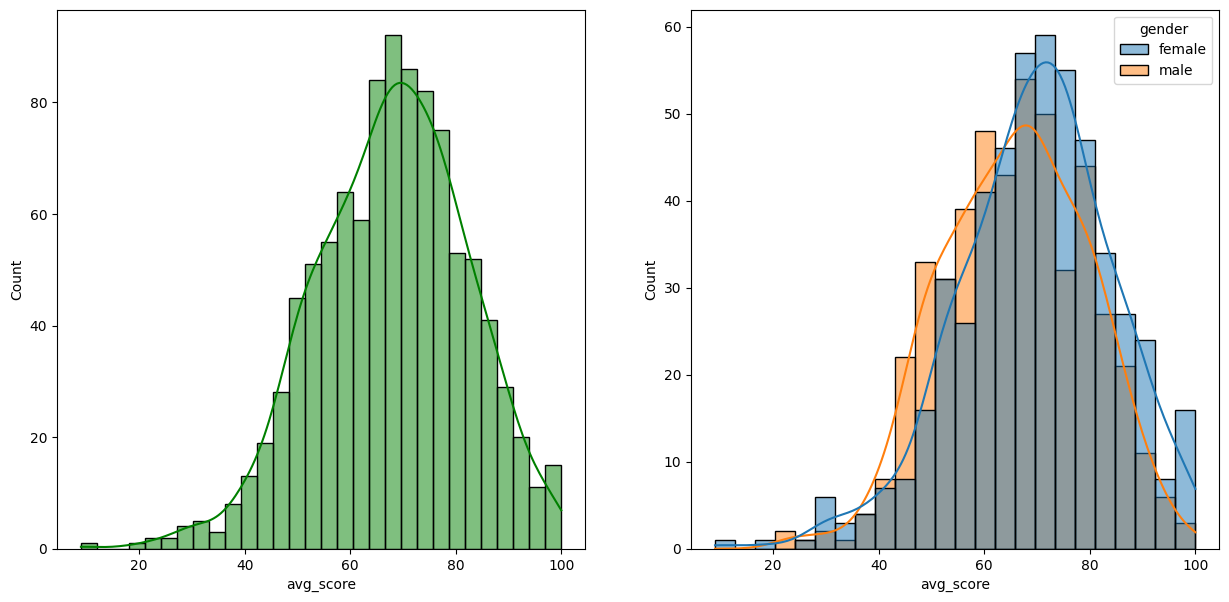

In [20]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

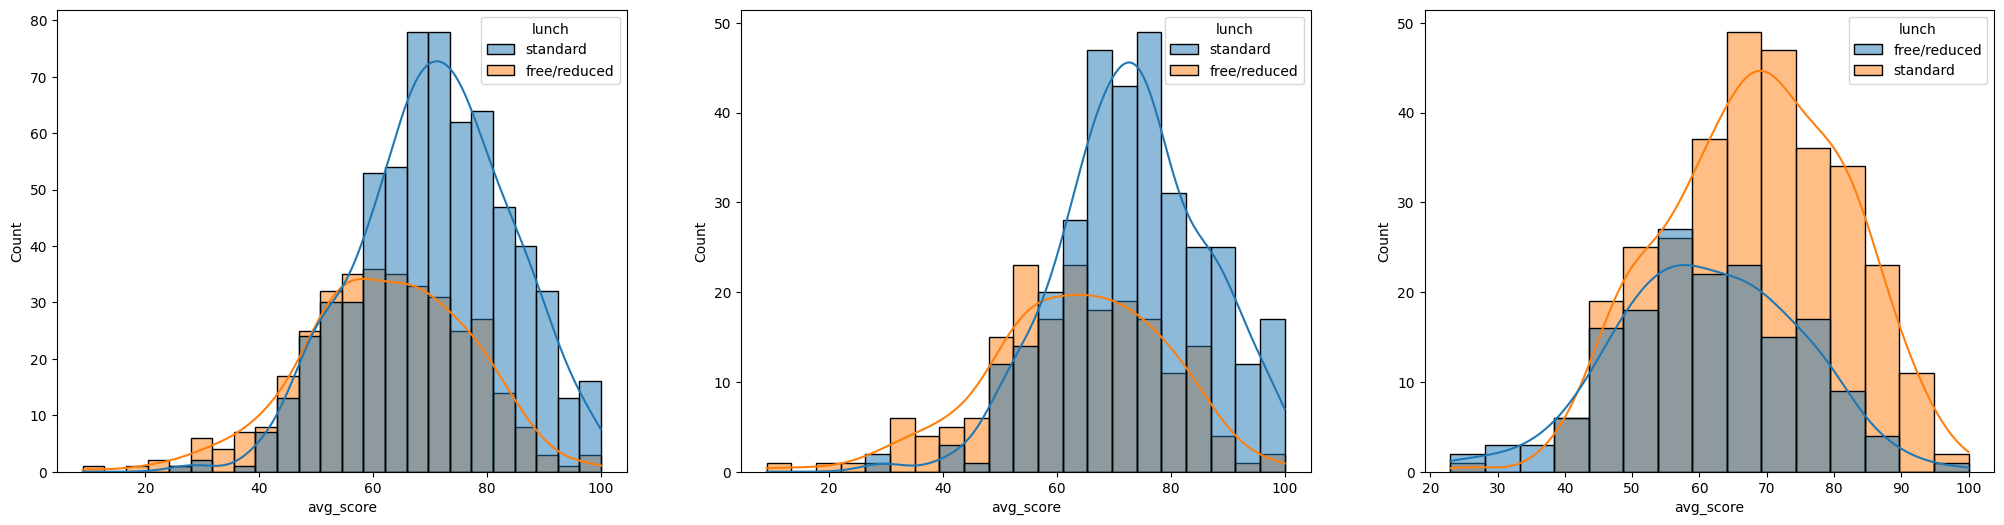

In [28]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

standard lunch helps male and female to perform well in exam 

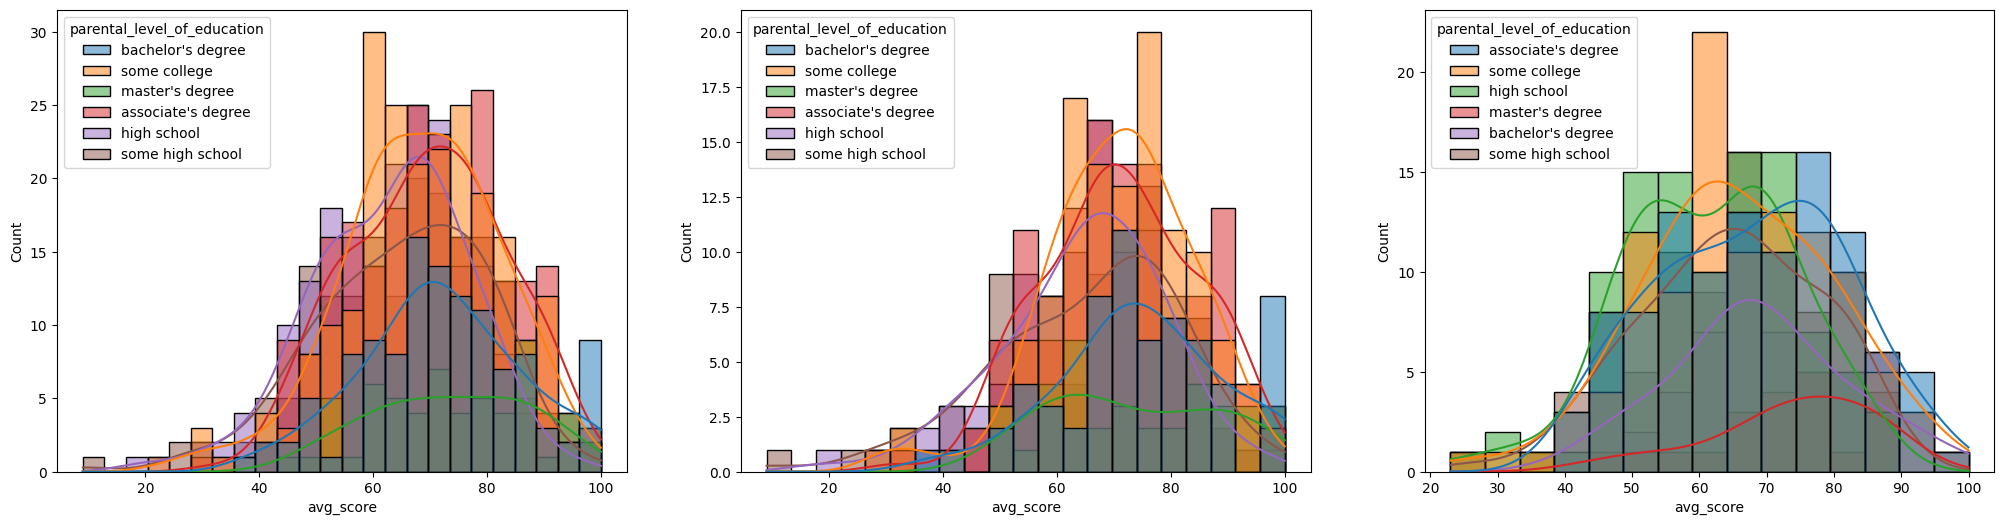

In [30]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(1,3,1)
sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.show()

parents degree doesnt effect much in general 

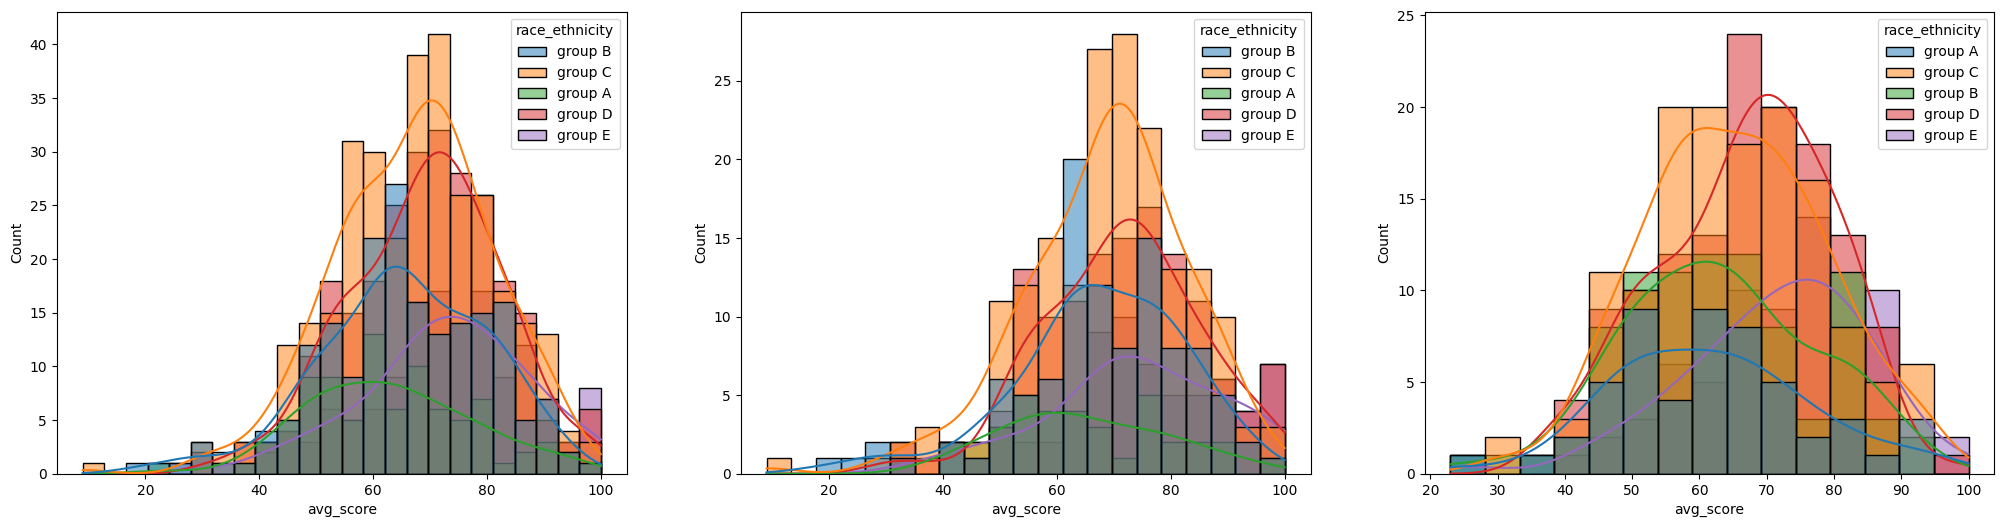

In [31]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(1,3,1)
sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.show()

Group A and B people are performing poor in exams in both male and female categories.

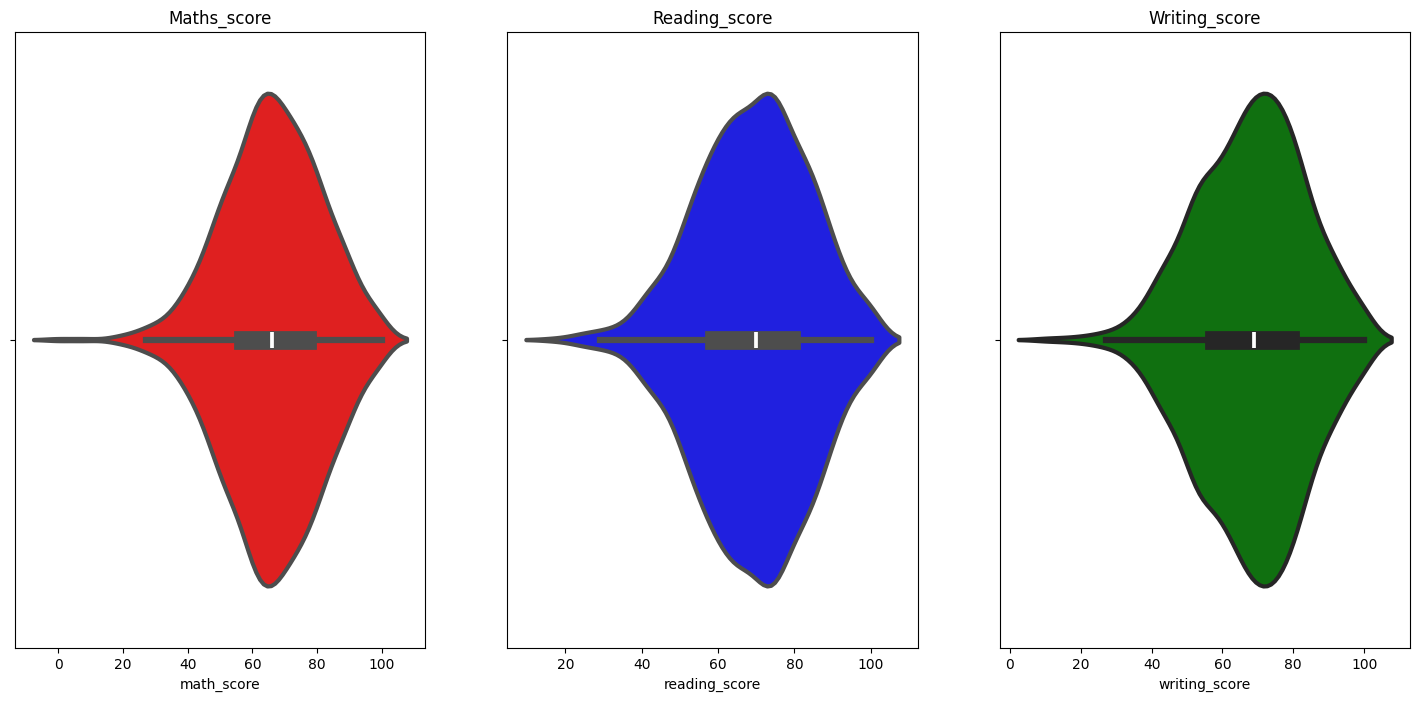

In [36]:
## maximum score of students in all three subjects 
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('Maths_score')
sns.violinplot(x='math_score',data=df,color='red',linewidth=3)

plt.subplot(1,3,2)
plt.title('Reading_score')
sns.violinplot(x='reading_score',data=df,color='blue',linewidth=3)

plt.subplot(1,3,3)
plt.title('Writing_score')
sns.violinplot(x='writing_score',data=df,color='green',linewidth=3)

plt.show()

## Multivariate analysis using pieplot

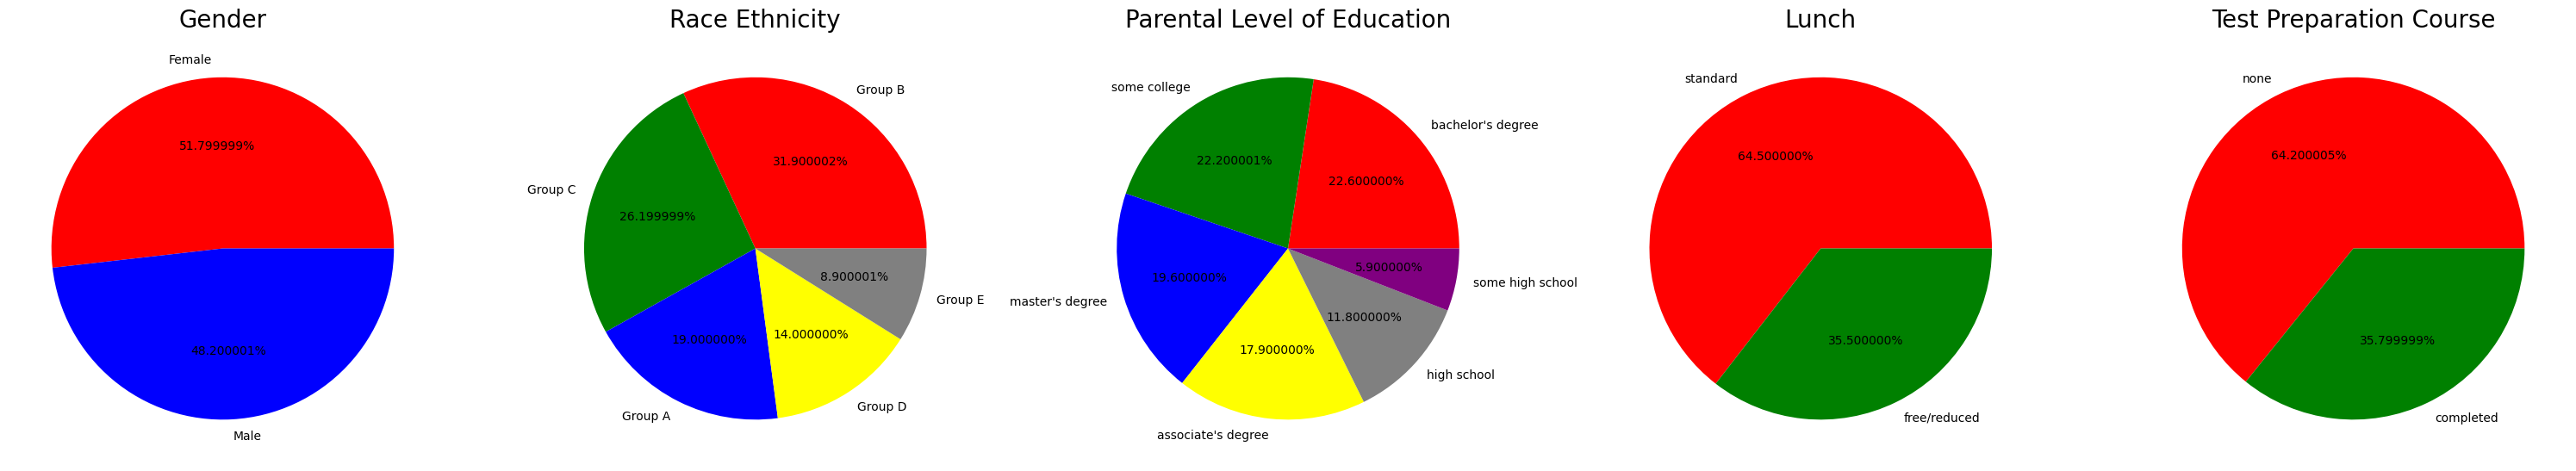

In [51]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','blue']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group B', 'Group C', 'Group A', 'Group D', 'Group E'
color = ['red','green','blue','yellow','grey'] 

plt.pie(size,colors=color,labels=labels,autopct = '%2f%%')
plt.title('Race Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color = ['red','green','blue','yellow','grey','purple']

plt.pie(size,colors=color,labels=labels,autopct = '%2f%%')
plt.title('Parental Level of Education',fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()



1. number of male and female students are equal 
2. Group C have more number of students 
3. parents having highre education are more 
4. Number of students having standerd lunch are heigher 
5. number of student who have not enroll in test preparation are heigher 


## UNIVARIATE ANALYSIS

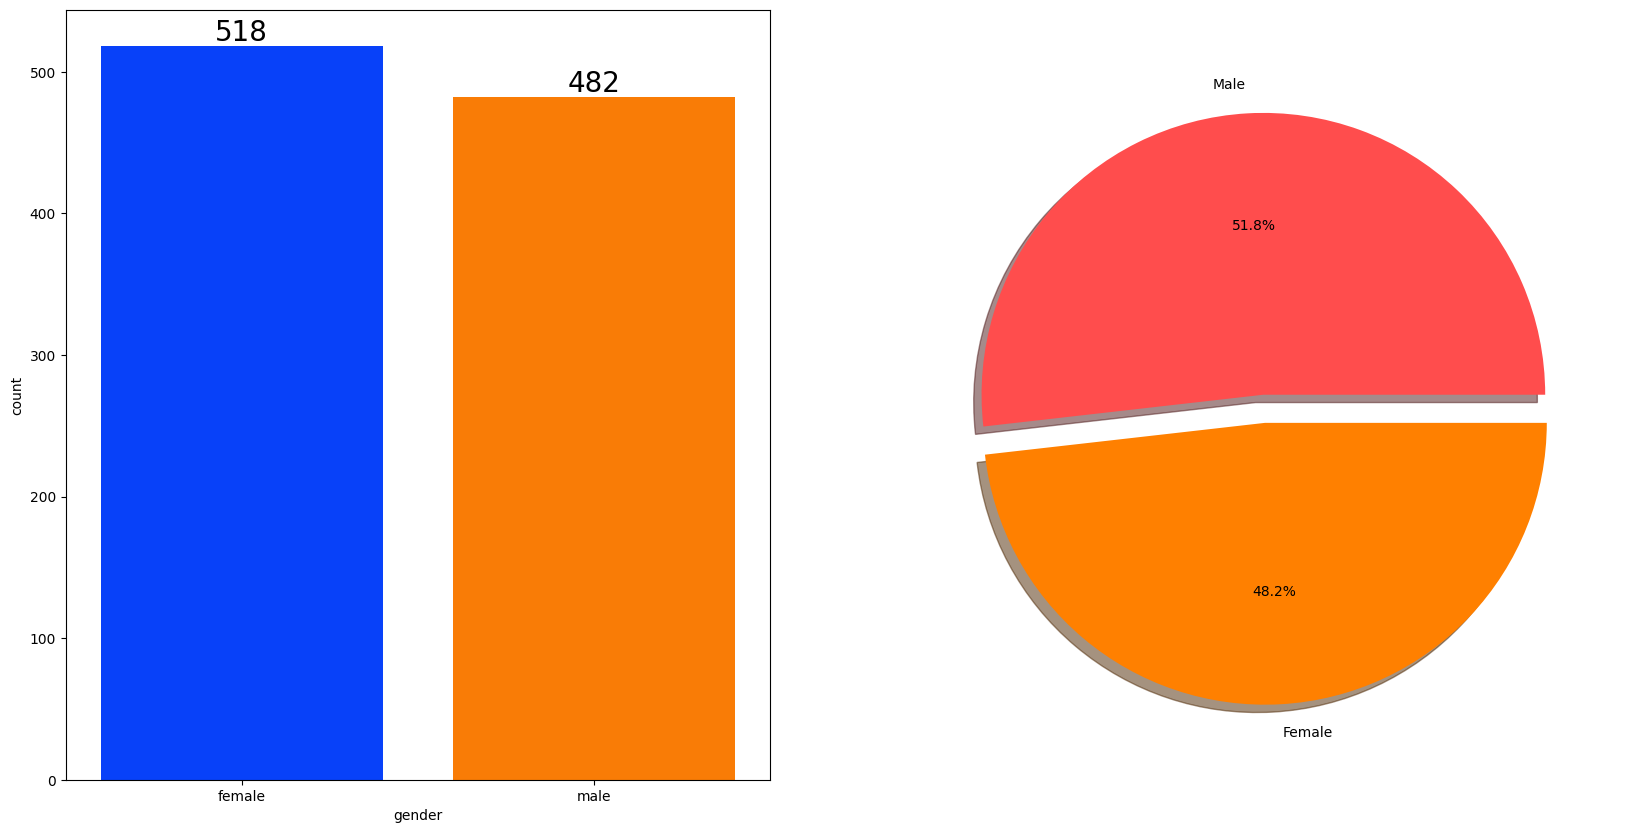

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## BIVARIATE ANALYSIS 

### gender impact ?

In [62]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


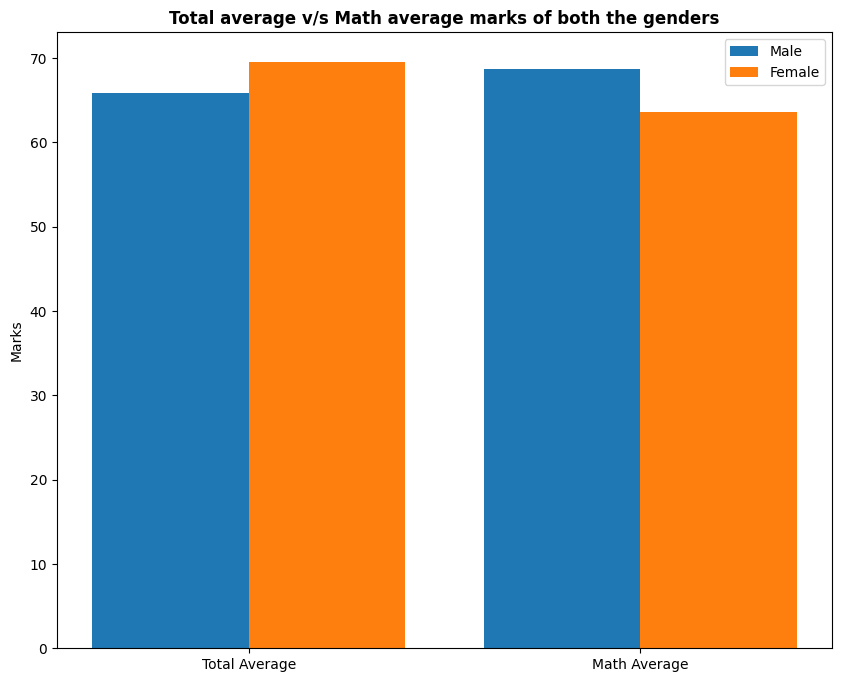

In [63]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Female perform well compare to male in maths  

## UNIVARIATE ANALYSIS on race_ethnicity column

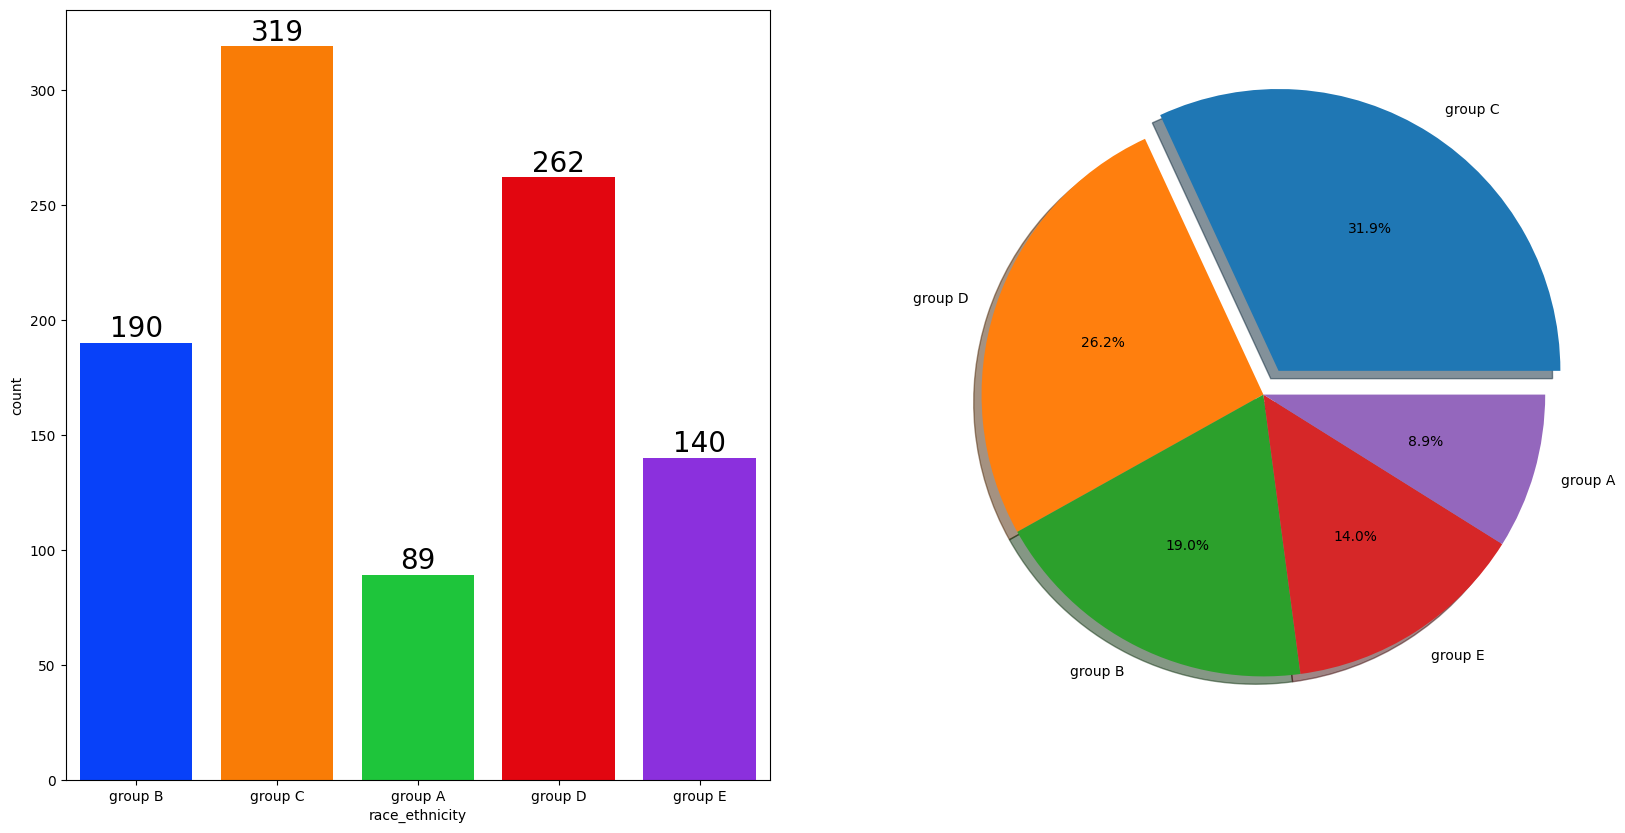

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

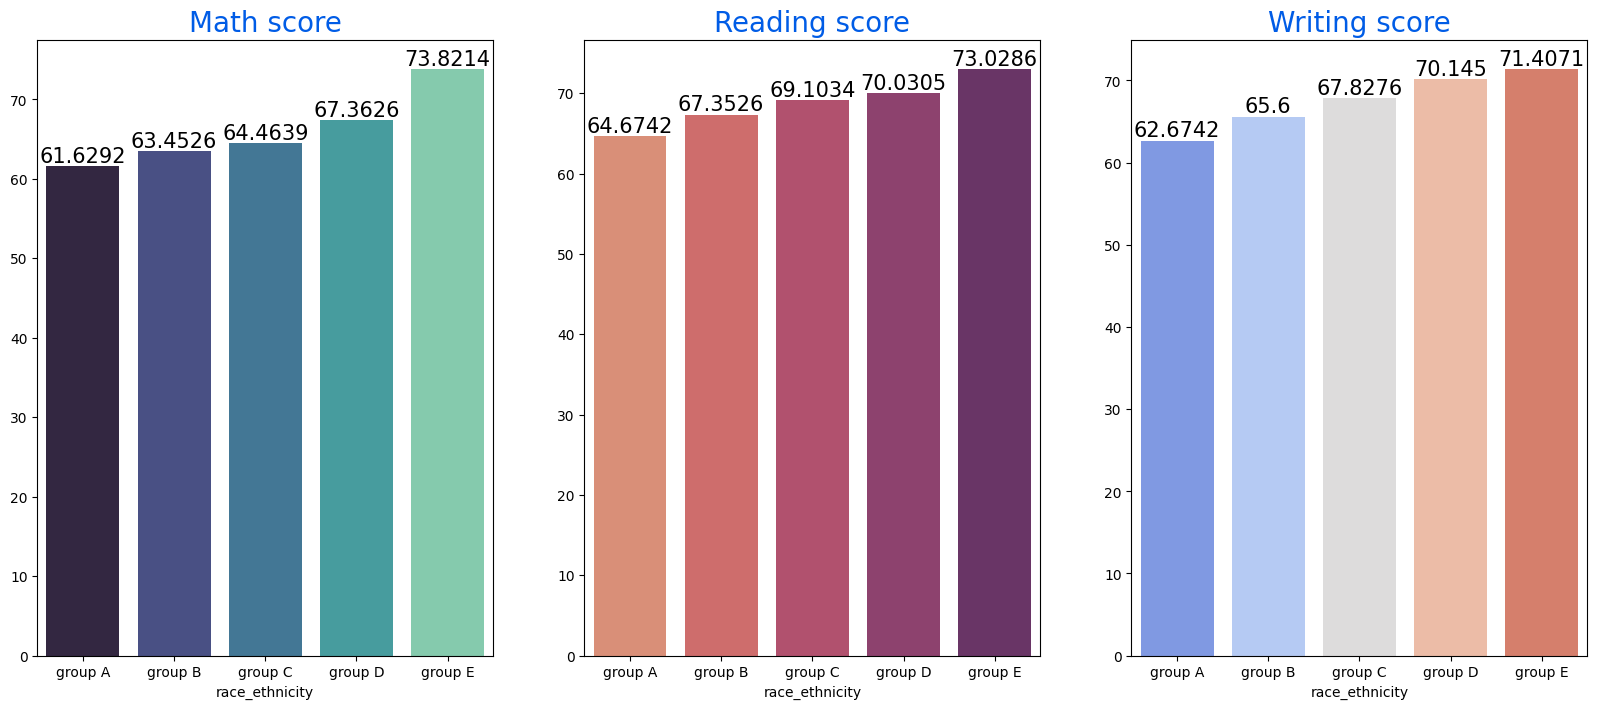

In [68]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### - Group E students score heighest and Group A student score less score and they both have small in size in opposize group c have majority 


## PARENTAL LEVEL OF EDUCATION COLUMN

## UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

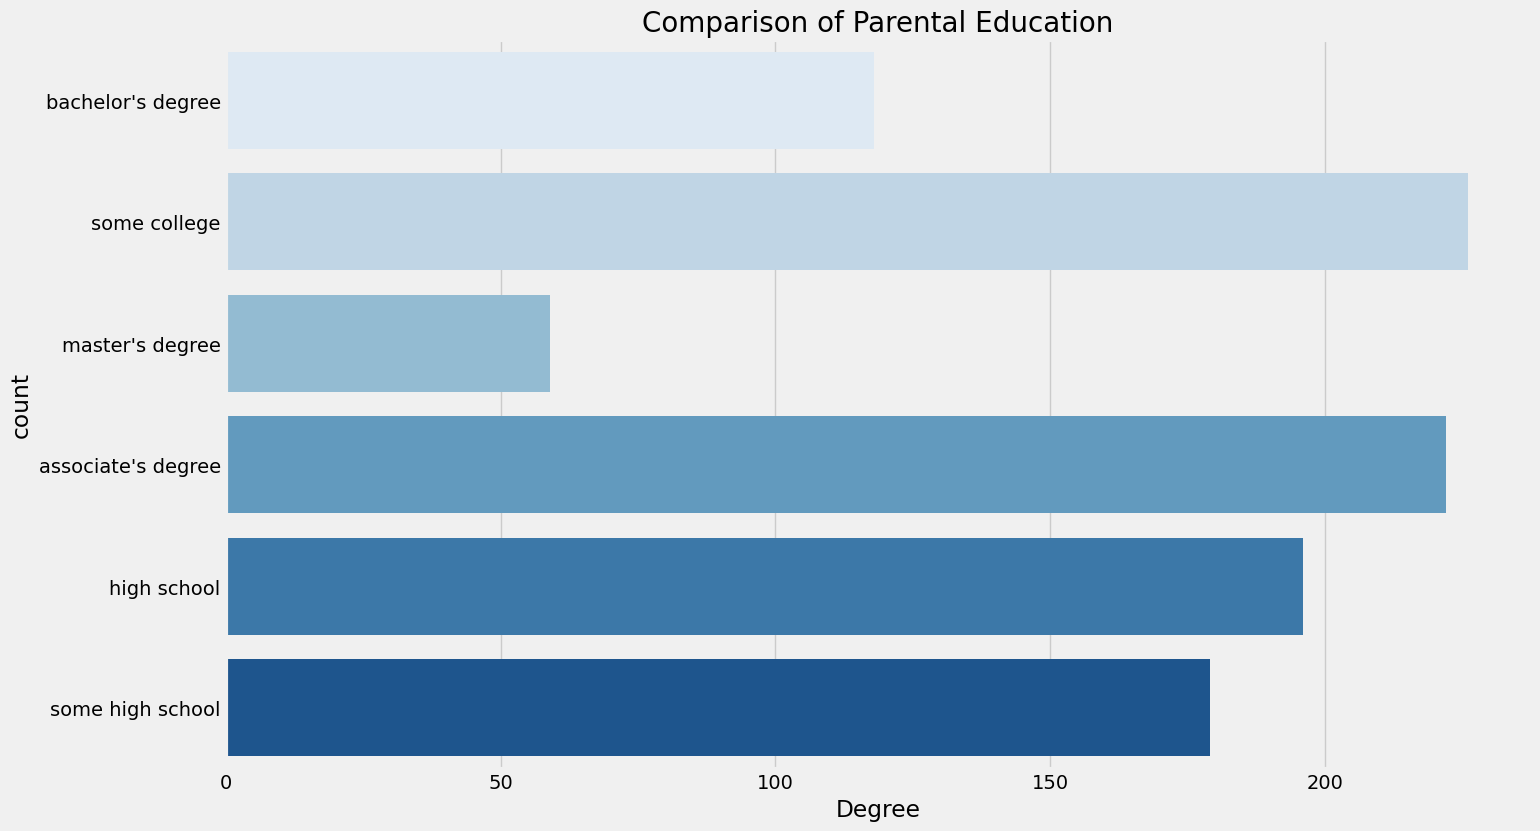

In [81]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Largest number of parents are from some college.

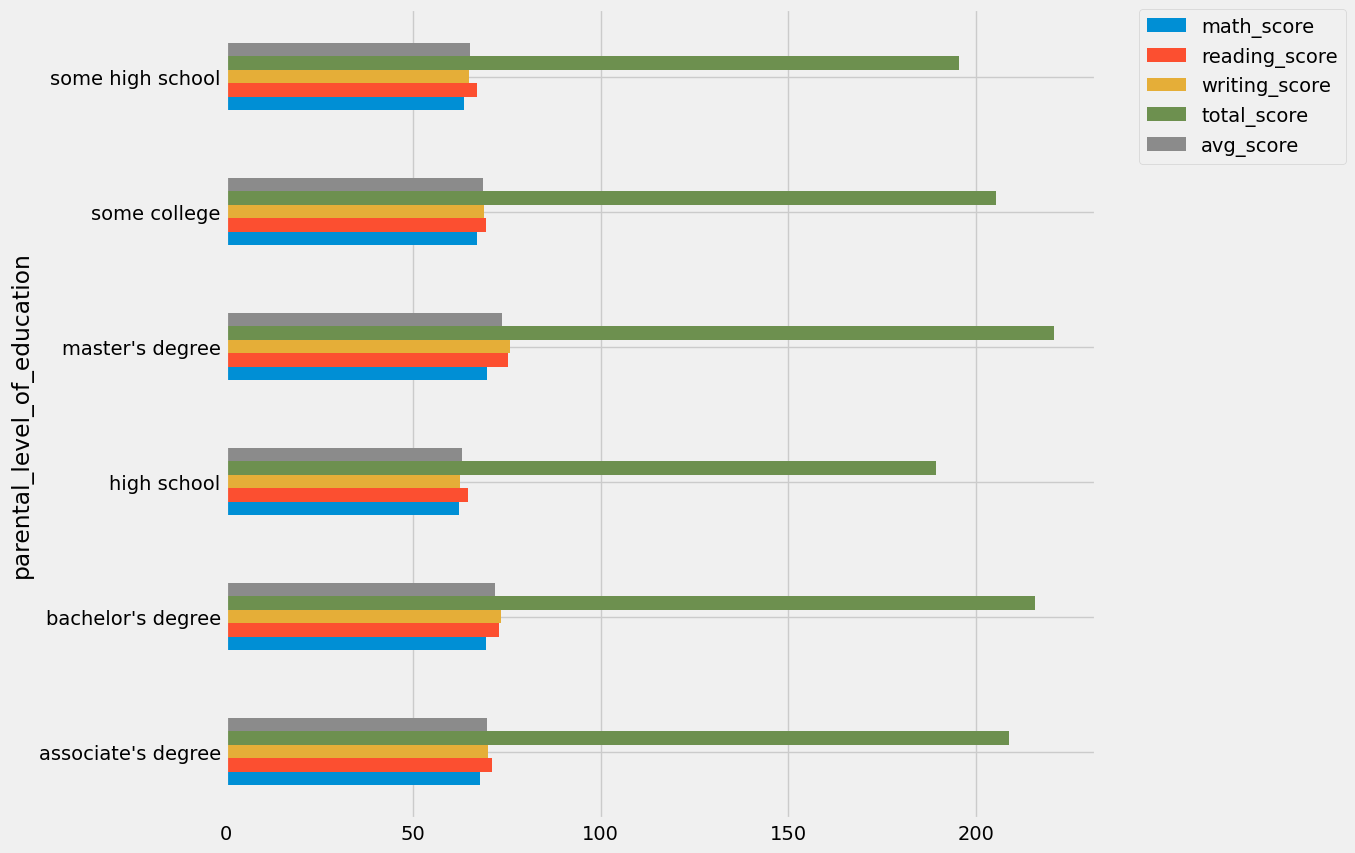

In [83]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['number']).columns

df.groupby('parental_level_of_education')[numeric_cols].mean().plot(kind='barh', figsize=(10, 10))

# Display the legend and plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### The score of student whose parents possess master and bachelor level education are higher than others.

# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

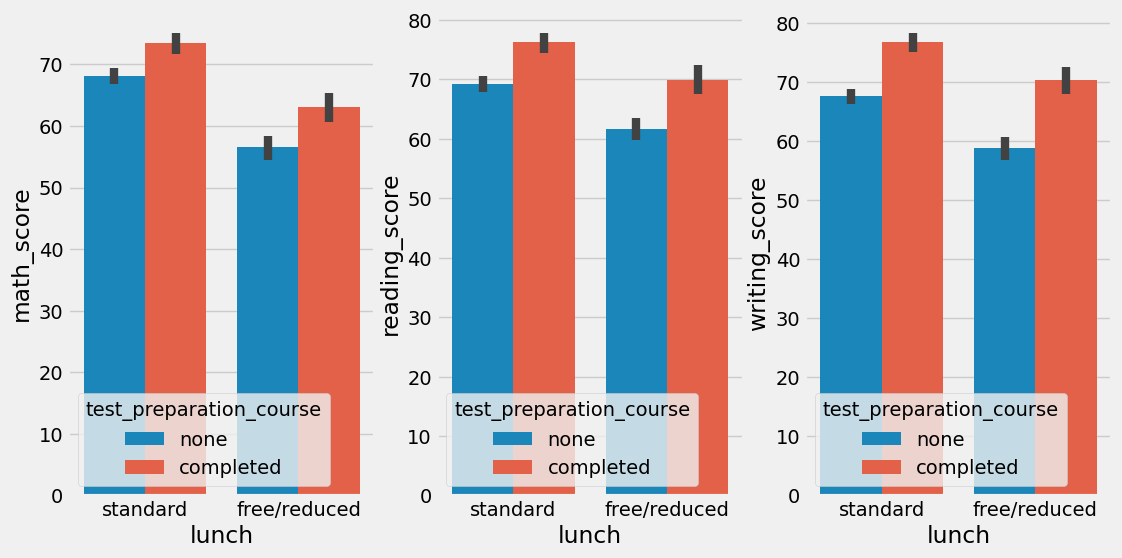

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

### student who completed test preparation coure scoring heigher in all categories 

CHECKING OUTLIERS

<Axes: ylabel='avg_score'>

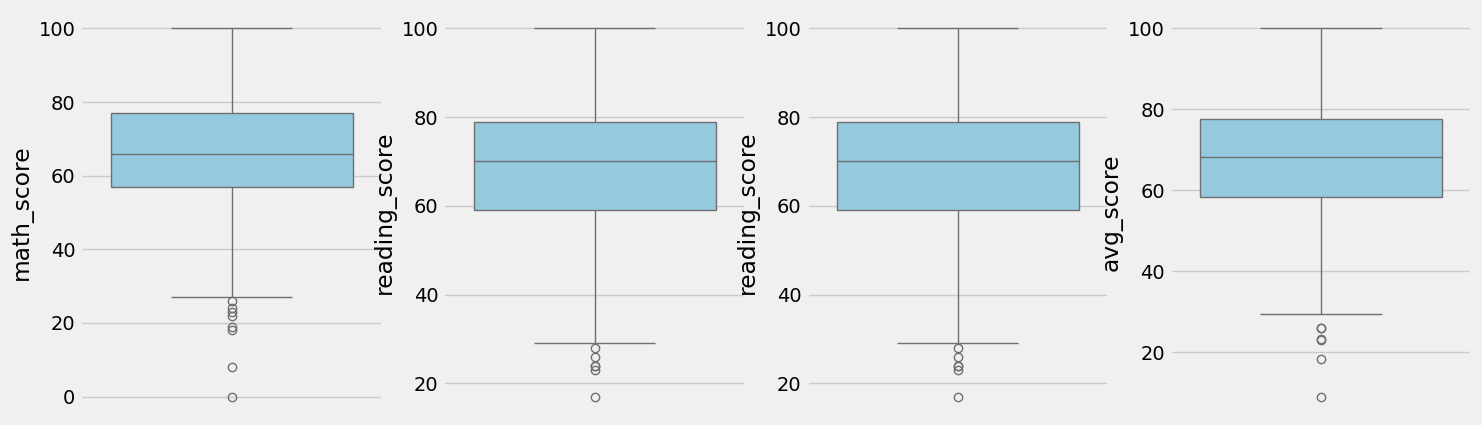

In [90]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading_score'],color='skyblue')

plt.subplot(143)
sns.boxplot(df['reading_score'],color='skyblue')

plt.subplot(144)
sns.boxplot(df['avg_score'],color='skyblue')

# MUTIVARIATE ANALYSIS USING PAIRPLOT

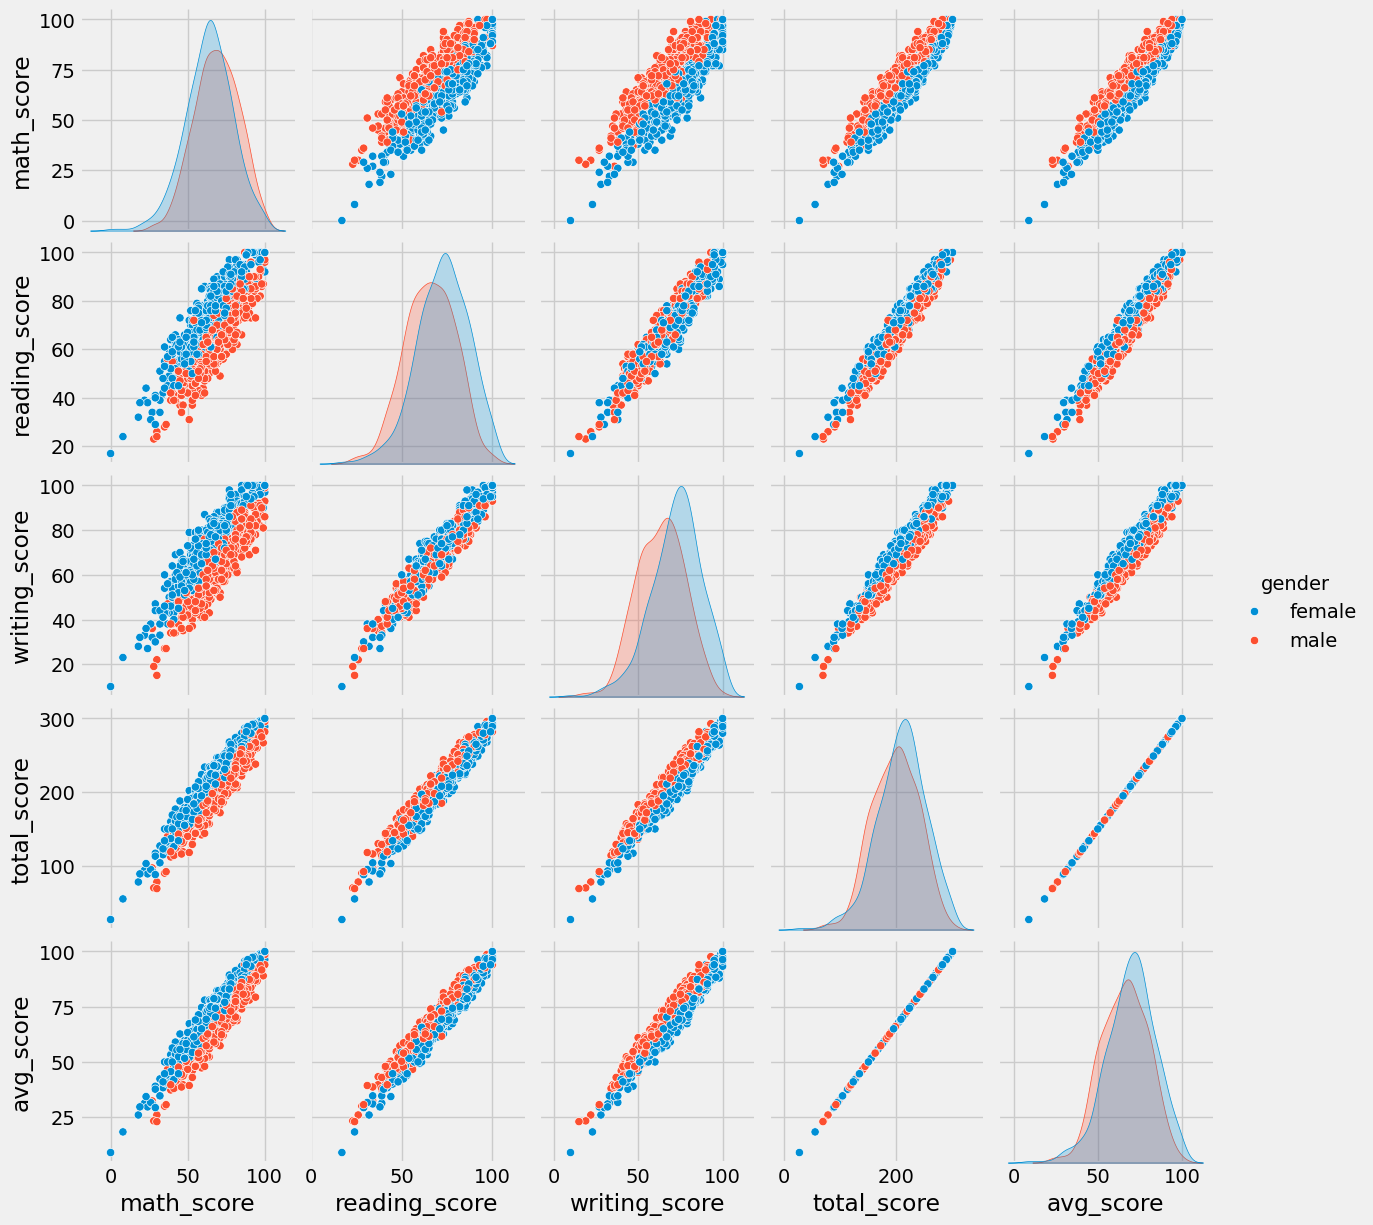

In [91]:
sns.pairplot(df,hue = 'gender')
plt.show()